downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/ellipses/e1.jpg


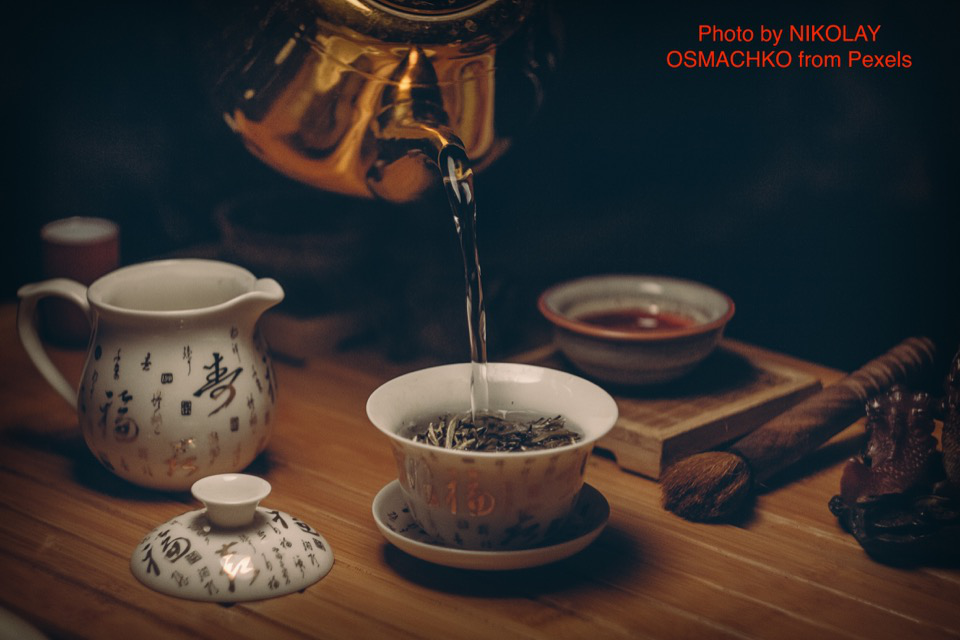

In [4]:
import cv2
import numpy as np
from math import *
from skimage import io
from matplotlib import pyplot as plt
from utils import cv2_imshow

def url_to_image(url):
  print("downloading %s" % (url))
  return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)

url2 = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/ellipses/e1.jpg"
imgc = url_to_image(url2)
cv2_imshow(imgc)

In [16]:
%load_ext nb_black

<IPython.core.display.Javascript object>

Ellipse 
[[49.99359278]]
[[185.53422945]]
[[-14.31341039]]
[[-26.06916883]]
[[26.79507068]]
[[-85.51281347]]
[[-136.38049551]]
u =  [[-3.17970586e-04  6.51848438e-01  7.58349203e-01]
 [-2.08945807e-03 -7.58348019e-01  6.51846544e-01]
 [ 9.99997767e-01 -1.37727083e-03  1.60314234e-03]]
m1v.T =  [[-3.17970586e-04  6.51848438e-01  7.58349203e-01]
 [-2.08945807e-03 -7.58348019e-01  6.51846544e-01]
 [ 9.99997767e-01 -1.37727083e-03  1.60314234e-03]]
v =  [[-3.17970586e-04 -2.08945807e-03  9.99997767e-01]
 [ 6.51848438e-01 -7.58348019e-01 -1.37727083e-03]
 [-7.58349203e-01 -6.51846544e-01 -1.60314234e-03]]
usv =  [[ 1.00000000e+00 -1.37462710e-01 -4.35893981e+02]
 [-1.37462710e-01  7.16482020e+00 -2.86434518e+03]
 [-4.35893981e+02 -2.86434518e+03  1.37085350e+06]]


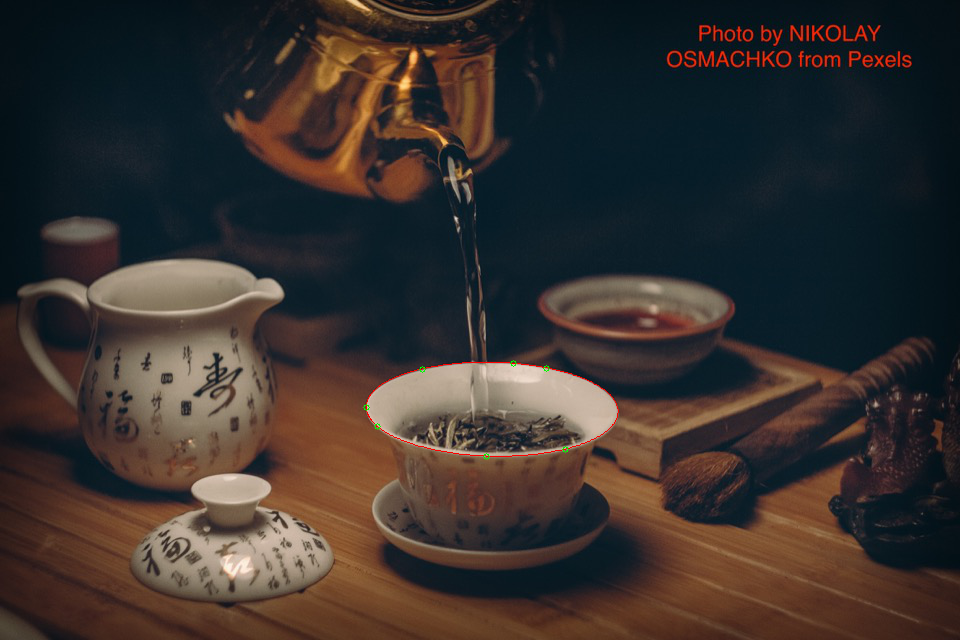

<IPython.core.display.Javascript object>

In [22]:
img = imgc.copy()

points = np.array(
    [
        [366, 407],
        [513, 363],
        [377, 426],
        [486, 456],
        [565, 449],
        [422, 369],
        [546, 368],
    ],
    np.double,
)

m = np.zeros((7, 6))

# (Ax^2 + 2Hxy + By^2 + 2Gx + 2Fy + C)^2 -> min
for k, (x, y) in enumerate(points):
    m[k][0] = x ** 2
    m[k][1] = 2 * x * y
    m[k][2] = y ** 2
    m[k][3] = 2 * x
    m[k][4] = 2 * y
    m[k][5] = 1

# Perform SVD on matrix m
mu, ms, mv = np.linalg.svd(m)

# R[0]=A R[1]=H R[2]=B R[3]=G R[4]=F R[5]=C
R = mv[5, :]
R /= R[0]
E = np.array([[R[0], R[1], R[3]], [R[1], R[2], R[4]], [R[3], R[4], R[5]]], np.double)

print("Ellipse " if E[0, 0] * E[1, 1] > E[0, 1] * E[1, 0] else "Not Ellipse!!!")

# result on given points:
for k in range(0, len(points)):
    print(
        np.matmul(
            np.matmul([[points[k][0], points[k][1], 1]], E),
            [[points[k][0]], [points[k][1]], [1]],
        )
    )

# find circle->ellipse conversion
u, s, v = np.linalg.svd(E)
u2 = np.matmul(u, np.diag(np.sqrt(s)))
H = np.linalg.inv(u2.T)

print("u = ", u)
print("m1v.T = ", np.matmul(np.diag([1, 1, -1]), v).T)

print("v = ", v)
print("usv = ", np.matmul(np.matmul(u, np.diag(s)), v))


# draw ellipse
for alpha in range(0, 360):
    a1 = np.matmul(H, [[sin(pi * alpha / 180)], [cos(pi * alpha / 180)], [1]])
    a1 = a1 / a1[2]
    a2 = np.matmul(
        H, [[sin(pi * (alpha + 1) / 180)], [cos(pi * (alpha + 1) / 180)], [1]]
    )
    a2 = a2 / a2[2]
    cv2.line(img, (a1[0], a1[1]), (a2[0], a2[1]), (0, 0, 255), 1)

for k in range(0, len(points)):
    cv2.circle(img, (int(points[k][0]), int(points[k][1])), 3, (0, 255, 0))

cv2_imshow(img)